# COVID 19 Dataset

In [177]:
# Load Libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, BayesianRidge, LinearRegression
import datetime
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import exponweib
%matplotlib inline

In [178]:
# Load given dataset
data = pd.read_csv('daily.csv')
data.head()


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200918,AK,7587.0,410706.0,NaN,418293.0,36.0,NaN,NaN,NaN,...,418293,1,0,cc5fc47f4be842f963af84b7fcd10209b229c2b9,0,0,0,0,0,NaN
1,20200918,AL,142863.0,910192.0,NaN,1039010.0,744.0,16227.0,NaN,1638.0,...,1053055,27,148,1d80c9982122b8a5e07be65d84c08ac3b4d4e74e,0,0,0,0,0,NaN
2,20200918,AR,74082.0,794097.0,NaN,866435.0,372.0,4896.0,193.0,NaN,...,868179,7,0,f2a66b16a735419549a96a760bcf829a8594a586,0,0,0,0,0,NaN
3,20200918,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,4953337207aa6ea9f70d3e91b93db3bd67bd2589,0,0,0,0,0,NaN
4,20200918,AZ,212942.0,1149377.0,NaN,1362319.0,516.0,21865.0,130.0,NaN,...,1362319,42,44,a326957ad5bbabb2b7d4f6d97e63c725b2420f9c,0,0,0,0,0,NaN


In [179]:
# Let's check information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11130 entries, 0 to 11129
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         11130 non-null  int64  
 1   state                        11130 non-null  object 
 2   positive                     11031 non-null  float64
 3   negative                     10893 non-null  float64
 4   pending                      1289 non-null   float64
 5   totalTestResults             11013 non-null  float64
 6   hospitalizedCurrently        8320 non-null   float64
 7   hospitalizedCumulative       6258 non-null   float64
 8   inIcuCurrently               4622 non-null   float64
 9   inIcuCumulative              1773 non-null   float64
 10  onVentilatorCurrently        3910 non-null   float64
 11  onVentilatorCumulative       622 non-null    float64
 12  recovered                    7478 non-null   float64
 13  dataQualityGrade

In [180]:
# Let's check for null values
data.isnull().sum()

date                               0
state                              0
positive                          99
negative                         237
pending                         9841
totalTestResults                 117
hospitalizedCurrently           2810
hospitalizedCumulative          4872
inIcuCurrently                  6508
inIcuCumulative                 9357
onVentilatorCurrently           7220
onVentilatorCumulative         10508
recovered                       3652
dataQualityGrade                1182
lastUpdateEt                     424
dateModified                     424
checkTimeEt                      424
death                            749
hospitalized                    4872
dateChecked                      424
totalTestsViral                 4978
positiveTestsViral              8870
negativeTestsViral              9372
positiveCasesViral              2919
deathConfirmed                  6834
deathProbable                   8107
totalTestEncountersViral        9575
t

In [181]:
# Let's sort values by date since here is the approach is chronological order.
data.sort_values('date', inplace=True)

In [182]:
# drop columns with 50% null values 
def drop_na_50(df):
    columns = df.columns
    for col in columns:
       if data[col].isnull().sum() > 0.5 * len(df):
         df.drop(col, 1, inplace=True)
    return df 
         
new_data = drop_na_50(data)


In [183]:
new_data.isnull().sum()

date                           0
state                          0
positive                      99
negative                     237
totalTestResults             117
hospitalizedCurrently       2810
hospitalizedCumulative      4872
recovered                   3652
dataQualityGrade            1182
lastUpdateEt                 424
dateModified                 424
checkTimeEt                  424
death                        749
hospitalized                4872
dateChecked                  424
totalTestsViral             4978
positiveCasesViral          2919
fips                           0
positiveIncrease               0
negativeIncrease               0
total                          0
totalTestResultsSource         0
totalTestResultsIncrease       0
posNeg                         0
deathIncrease                  0
hospitalizedIncrease           0
hash                           0
commercialScore                0
negativeRegularScore           0
negativeScore                  0
positiveSc

In [184]:
new_data.fillna(0, inplace=True)

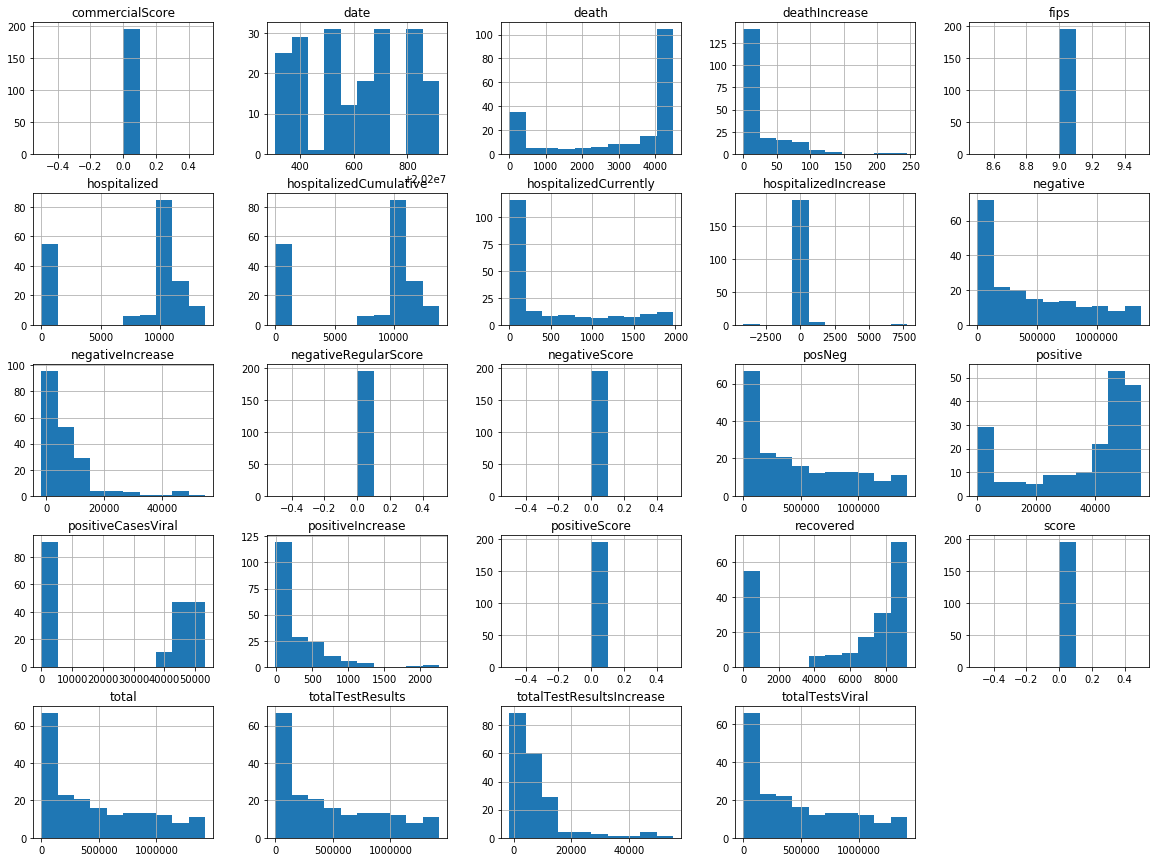

In [185]:
new_data[new_data.state=='CT'].hist(bins=10, figsize=(20, 15))
plt.show()

In [186]:
# Let's drop the features that are not required
# drop variables with few/no variations
new_data.drop(['commercialScore', 'fips', 'hospitalizedIncrease', 'negativeRegularScore', 'negativeScore', 'positiveScore', 'score'], axis=1, inplace=True)

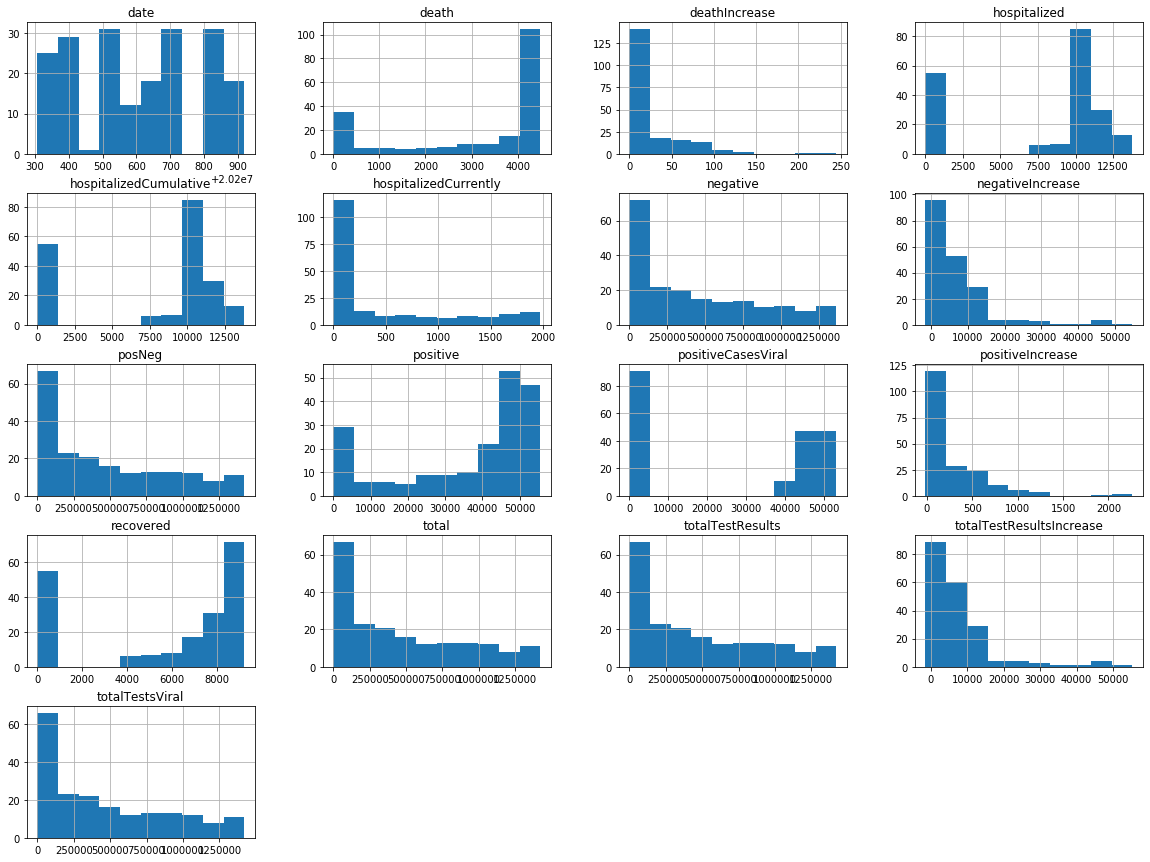

In [187]:
new_data[new_data.state=='CT'].hist(bins=10, figsize=(20, 15))
plt.show()

In [188]:
# check for null values
new_data.isnull().sum()

date                        0
state                       0
positive                    0
negative                    0
totalTestResults            0
hospitalizedCurrently       0
hospitalizedCumulative      0
recovered                   0
dataQualityGrade            0
lastUpdateEt                0
dateModified                0
checkTimeEt                 0
death                       0
hospitalized                0
dateChecked                 0
totalTestsViral             0
positiveCasesViral          0
positiveIncrease            0
negativeIncrease            0
total                       0
totalTestResultsSource      0
totalTestResultsIncrease    0
posNeg                      0
deathIncrease               0
hash                        0
dtype: int64

In [189]:
# dictonary for mapping state to abbreviation 
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [190]:
# Again, let's use Connecticut as an example. It is an amazing state.
us_state_abbrev['Connecticut']

'CT'

In [191]:
# this data frame is going to provide static variables
additional_data = pd.read_csv('COVID19state.csv')
additional_data.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1,26.6,66.0,0.36,0.39,0.25,3/19/2020
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1,62.8,59.0,0.33,0.37,0.31,3/16/2020
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0,60.4,56.2,0.34,0.37,0.30,3/17/2020
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1,60.3,89.8,0.33,0.36,0.30,3/16/2020
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9,59.4,95.0,0.33,0.40,0.26,3/19/2020


In [192]:
# Let's check for null values
additional_data.isnull().sum()

State                  0
Tested                 0
Infected               0
Deaths                 0
Population             0
Pop Density            0
Gini                   0
ICU Beds               0
Income                 0
GDP                    0
Unemployment           0
Sex Ratio              0
Smoking Rate           0
Flu Deaths             0
Respiratory Deaths     0
Physicians             0
Hospitals              0
Health Spending        0
Pollution              0
Med-Large Airports     0
Temperature            0
Urban                  0
Age 0-25               0
Age 26-54              0
Age 55+                0
School Closure Date    3
dtype: int64

In [193]:
# make the data consistent with the other data frame 
for i in additional_data.State.unique():
    additional_data.replace(i, us_state_abbrev[i], inplace=True)

In [194]:
# Let's take a look at California's population density.
additional_data[additional_data.State=='CA']['Pop Density']

4    256.3727
Name: Pop Density, dtype: float64

In [195]:
# incoporate population density into prediction 
pop_dense = [] 
for i in new_data.state:
    pop_dense.append(additional_data[additional_data.State==i]['Pop Density'].sum())

In [196]:
new_data['pop_dense'] = pop_dense

In [197]:
new_data['pop_dense'].head()

11129    117.3272
11128    894.4355
11126    894.4355
11127    117.3272
11124    894.4355
Name: pop_dense, dtype: float64

In [198]:
# Let's scale the population density based on all the states.
min_max_scaler = MinMaxScaler()
new_data['pop_dense'] = min_max_scaler.fit_transform(np.array(new_data['pop_dense']).reshape(-1, 1))


In [199]:
new_data['pop_dense'].head()

11129    0.009931
11128    0.075706
11126    0.075706
11127    0.009931
11124    0.075706
Name: pop_dense, dtype: float64

In [200]:
# Let's load dataset
mobility_data = pd.read_csv('applemobilitytrends-2020-09-18.csv')
mobility_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-09-09,2020-09-10,2020-09-11,2020-09-12,2020-09-13,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,171.54,166.72,175.48,186.57,173.76,142.75,144.04,135.62,140.86,151.82
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,175.61,163.28,175.05,169.85,154.67,159.40,157.19,160.34,161.07,165.59
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,59.49,63.20,77.16,69.70,42.75,55.70,57.94,61.09,66.01,76.20
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,46.81,50.76,57.64,53.04,34.87,44.74,44.54,50.38,56.07,62.88
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,89.93,96.29,98.60,83.67,85.82,89.24,93.18,95.04,101.92,102.84


In [201]:
# check for null values
mobility_data.isnull().sum()

geo_type                  0
region                    0
transportation_type       0
alternative_name       3647
sub-region             1362
                       ... 
2020-09-14               39
2020-09-15               39
2020-09-16               39
2020-09-17               39
2020-09-18               39
Length: 256, dtype: int64

In [202]:
# Let's make the data consistent with the other data frame 
for i in mobility_data['sub-region'].unique():
    if i in us_state_abbrev.keys():
        mobility_data.replace(i, us_state_abbrev[i], inplace=True)

In [203]:
mobility_data['transportation_type'].unique()

array(['driving', 'walking', 'transit'], dtype=object)

In [204]:
# get individual states and dates
unique_states = new_data.state.unique()
unique_states.sort()
unique_dates = new_data.date.unique()

# making sure that the dates match between mobility and testing/cases
mobility_latest_date = datetime.datetime.strptime(mobility_data.columns[-1], '%Y-%m-%d').strftime('%Y%m%d')
mobility_latest_index = np.where(unique_dates == int(mobility_latest_date))[0][0]

# start from a later date 3/1/2020
unique_dates = unique_dates[39:mobility_latest_index+1]

In [205]:
# gets the mobility information of a particular day
def get_mobility_by_state(transport_type, state, day):
    return mobility_data[mobility_data['sub-region']==state][mobility_data['transportation_type']==transport_type].sum()[day]

In [206]:
get_mobility_by_state('walking', 'FL', '2020-03-01')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


3880.5399999999995

In [207]:
# Let's change the date format to match the mobility data 
revised_unique_dates = [] 
for i in range(len(unique_dates)):
    revised_unique_dates.append(datetime.datetime.strptime(str(unique_dates[i]), '%Y%m%d').strftime('%Y-%m-%d'))
revised_unique_dates

['2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-28',
 '2020-03-29',
 '2020-03-30',
 '2020-03-31',
 '2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-

In [208]:
# Now Let's take a look at Florida's mobility at a random day.
print(get_mobility_by_state('transit', 'FL', revised_unique_dates[9]))

1518.3599999999997


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
# Let's convert our dates into numbers. As machine learning algorithm cannot take text.
def convert_date_to_int(d):
    return [i for i in range(len(revised_unique_dates))]

days_since_3_1 = convert_date_to_int(revised_unique_dates)

In [210]:
days_ahead = 10
future_dates = [i for i in range(len(revised_unique_dates)+days_ahead)]

In [211]:
# Let's use SVM implementation
def svm_reg(X_train, X_test, y_train, y_test, future_forecast, state):
        
    svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1, degree=4, C=0.1)
    svm_confirmed.fit(X_train, y_train)
    test_svm_pred = svm_confirmed.predict(X_test)
    svm_pred = svm_confirmed.predict(future_forecast)
    
    plt.plot(y_test)
    plt.plot(test_svm_pred)
    plt.title('Testing Set Evaluation for {}'.format(state))
    plt.xlabel('Days since 3/1/2020')
    plt.ylabel('# of positive coronavirus cases')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    
    print('MAE:', mean_absolute_error(test_svm_pred, y_test))
    print('MSE:',mean_squared_error(test_svm_pred, y_test))

    # plot the graph to see compare predictions and actual coronavirus cases
    plt.plot(positive)
    plt.plot(svm_pred)
    plt.title('Coronavirus Cases in {}'.format(state))
    plt.legend(['Actual cases', 'Predicted cases using support vector regression'])
    plt.xlabel('Days since 3/1/2020')
    plt.ylabel('# of positive coronavirus cases')
    plt.show()
    print('Completed:', state)

In [212]:
def bayesian_ridge(X_train, X_test, y_train, y_test, future_forecast, state):
        
    # convert data to be compatible with polynomial regression
    bayesian_poly = PolynomialFeatures(degree=3)
    bayesian_poly_X_train = bayesian_poly.fit_transform(X_train)
    bayesian_poly_X_test = bayesian_poly.fit_transform(X_test)
    bayesian_poly_future_forecast = bayesian_poly.fit_transform(future_forecast)
    
    # polynomial regression model
    # bayesian ridge polynomial regression
    tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
    alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
    normalize = [True, False]
    fit_intercept = [True,  False]
    lambda_init = [1e-2, 1e-1, 1, 1e1]

    bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                    'normalize' : normalize, 'fit_intercept': fit_intercept, 'lambda_init' : lambda_init}

    bayesian = BayesianRidge()
    bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_root_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=200, verbose=1)
    bayesian_search.fit(bayesian_poly_X_train, y_train)
    
    # get the best estimator 
    best_params = bayesian_search.best_params_
    bayesian_confirmed = BayesianRidge(**best_params)
    bayesian_confirmed.fit(bayesian_poly_X_train, y_train)
    
    test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test)
    bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forecast)
    
    plt.plot(y_test)
    plt.plot(test_bayesian_pred)
    plt.title('Testing Set Evaluation for {}'.format(state))
    plt.xlabel('Days since 3/1/2020')
    plt.ylabel('# of positive coronavirus cases')
    plt.legend(['Actual', 'Predicted'])
    plt.show()
    
    print('MAE:', mean_absolute_error(test_bayesian_pred, y_test))
    print('MSE:',mean_squared_error(test_bayesian_pred, y_test))
    print('Weight:', bayesian_confirmed.coef_)

    # plot the graph to see compare predictions and actual coronavirus cases
    plt.plot(positive)
    plt.plot(bayesian_pred)
    plt.title('Coronavirus Cases in {}'.format(state))
    plt.legend(['Actual cases', 'Predicted cases using bayesian ridge'])
    plt.xlabel('Days since 3/1/2020')
    plt.ylabel('# of positive coronavirus cases')
    plt.show()
    print('Completed:', state)

In [213]:
# helper function for finding daily change 
def daily_change(y2, y1):
    return (y2-y1)

In [214]:
# get moving average for positive case 

def moving_positive_cases(data, window_size):
    moving_positive = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_positive.append(np.mean(data[i:i+window_size]))
        else:
            moving_positive.append(np.mean(data[i:len(data)]))
    return moving_positive

In [215]:
def future_testing_extrapolation(X, y, future_forecast, state):
    poly = PolynomialFeatures(degree=3)
    poly_X = poly.fit_transform(X)
    poly_future_forecast = poly.fit_transform(future_forecast)
    
    poly_confirmed = LinearRegression(fit_intercept=True, normalize=True)
    poly_confirmed.fit(poly_X, y)
    
    poly_pred = poly_confirmed.predict(poly_future_forecast)
    
    plt.plot(y)
    plt.plot(poly_pred)
    plt.title('Coronavirus testing in {}'.format(state))
    plt.legend(['Actual testing', 'Predicted testing using polynomial regression'])
    plt.xlabel('Days since 3/1/2020')
    plt.ylabel('# of testing')
    plt.show()
    
    future_increases = [] 
    
    # calulate future rates of change 
    for i in range(days_ahead):
        c = len(X) - 1
        future_increases.append(daily_change(poly_pred[c+i+1], poly_pred[c+i]))
    return future_increases


In [216]:
# Reshape our arays for sklearn.
days_since_3_1 = np.array(days_since_3_1).reshape(-1, 1)
future_dates = np.array(future_dates).reshape(-1, 1)

In [217]:
def window_average(window_size, data, method):
    avg_data = [] 
    date_length = len(data)
    
    for i in range(len(data)):
        remainder = i % window_size 
        if method == 'median':
            if i - remainder + window_size - 1 < date_length:
                avg_data.append(np.median(data[i-remainder:i-remainder+window_size-1]))
            else:
                delta = date_length % window_size 
                avg_data.append(np.median(data[date_length-delta-1:date_length-1]))
        elif method == 'mean':
             if i - remainder + window_size - 1 < date_length:
                avg_data.append(np.mean(data[i-remainder:i-remainder+window_size-1]))
             else:
                delta = date_length % window_size 
                avg_data.append(np.mean(data[date_length-delta-1:date_length-1]))
        else:
            warnings.warn('Methods can only be mean or median')
            
    return avg_data

In [218]:
# returns true if it is a weekend, and false if it is a weekday 
def weekday_or_weekend(date):
    date_obj = datetime.datetime.strptime(str(date), '%Y%m%d')
    day_of_the_week =  date_obj.weekday()
    if (day_of_the_week+1) % 6 == 0 or (day_of_the_week+1) % 7 == 0:
        return True 
    else:
        return False 


In [219]:
len(future_dates[-10:])

10

In [220]:
# implementing this in the prediction in the future 
def mobility_scenario(mobility, mode):
    local_min = np.min(mobility)
    local_max = np.max(mobility)
    
    local_min_index = np.where(mobility==local_min)[0]
    local_max_index = np.where(mobility==local_max)[0]
    
    slope = (local_max - local_min) / (local_max_index - local_min_index)
    
#     plt.axhline(y=local_min, color='red')
#     plt.axhline(y=local_max, color='purple')
    
    # if mobility increases 
    
    if mode == 'decrease':
        # extrapolating mobility 
        m = mobility[-1] + slope 
        if m < local_min:
            future_mobility = local_min
        else:
            future_mobility = m
    
    # if mobility decreases 
    if mode == 'increase':
         # extrapolating mobility 
        m = mobility[-1] + np.abs(slope) 
        if m > local_max:
            future_mobility = local_max
        else:
            future_mobility = m
            
    return future_mobility

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


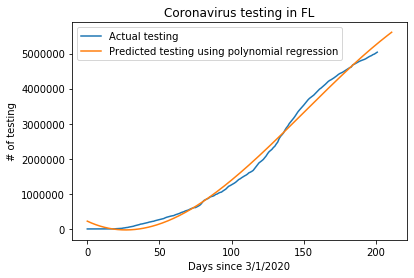

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


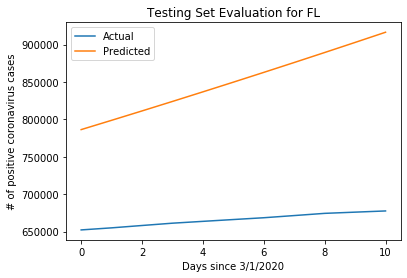

MAE: 184438.15919698312
MSE: 35104311781.766266
Weight: [-6.52234404e-07 -2.67903409e-06 -2.26416045e-08  1.84934564e-06
 -3.41436155e-06 -9.75986270e-07  9.89439346e-03 -9.29992507e-08
  2.40336178e-04 -2.08591288e-04 -1.65927756e-05 -7.85935218e-10
  6.41974764e-08 -1.18524870e-07 -3.38799918e-08  1.45837826e-06
  1.06119929e-06  1.83776619e-06 -4.27201830e-06 -3.46763694e-06
 -1.25444084e-06  1.12706248e-01  3.43470310e-04  1.77561470e-02
 -9.61141628e-03  9.28777217e-03 -3.22833236e-09  8.34294106e-06
 -7.24096071e-06 -5.75995467e-07  9.97803430e-05  1.51516315e-04
  2.39816575e-04 -3.08367792e-04 -2.11195506e-04 -2.84012499e-05
 -2.72828543e-11  2.22852747e-09 -4.11442841e-09 -1.17609779e-09
  5.06256017e-08  3.68380805e-08  6.37955347e-08 -1.48297261e-07
 -1.20374264e-07 -4.35461948e-08  3.87706263e-07  1.06054708e-06
  1.45791562e-06  5.11386663e-07  1.05874494e-06  1.82796337e-06
 -4.64108866e-06 -4.28390594e-06 -3.51599620e-06 -1.48926500e-06]


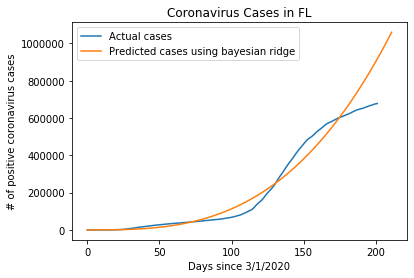

Completed: FL


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


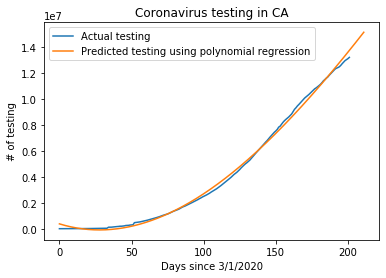

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    6.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


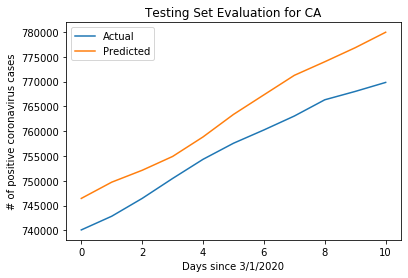

MAE: 6865.16599454772
MSE: 49953359.24017287
Weight: [ 7.96144755e+02 -5.85424884e+02  1.72308702e+01 -5.24372601e+01
 -1.62209981e+03 -1.11586633e+03  3.53638896e+01 -1.26875645e+01
  8.40073007e+02  9.82305670e+02  1.93819714e+02  3.20845417e-01
 -1.13432649e+00 -3.51491690e+01 -2.41926223e+01 -3.91808401e+01
  5.57107739e+01 -4.41823578e+01 -7.55606979e+02 -1.20317191e+03
  9.08038886e+01 -1.77104595e-01  7.30200556e-01  7.27147018e+01
 -4.92828239e+01  9.43432033e-01 -2.77223099e-01  1.82298961e+01
  2.13179266e+01  4.20795631e+00 -1.18916861e+04  6.65810153e+03
  1.46001283e+03  7.67395909e+02  1.13246679e+03 -4.50784728e+02
  8.68567355e-03 -2.53387986e-02 -7.63376340e-01 -5.25066167e-01
 -8.50229404e-01  1.20882681e+00 -9.58708244e-01 -1.63962658e+01
 -2.61084947e+01  1.97017539e+00 -1.14470256e+02 -6.50488919e+00
 -3.83844289e+01  2.13271115e+01  5.74536887e+01 -3.78432566e+01
 -3.10153073e+02 -9.34890373e+01 -7.01481755e+02 -2.82293735e+01]


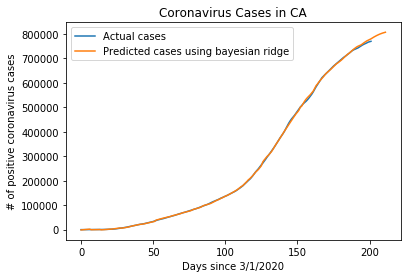

Completed: CA


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


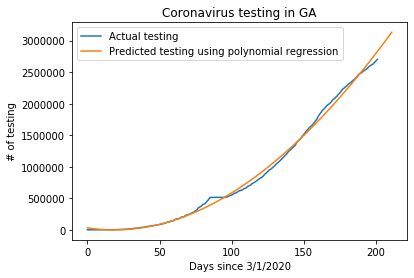

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


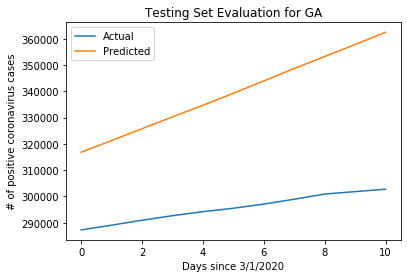

MAE: 43906.59202882082
MSE: 2017339684.2823927
Weight: [-8.13310414e-03 -3.79315165e-01 -1.28506516e-04  3.19550491e-03
 -7.61529011e-03 -5.25536719e-03  4.21823467e+00 -5.99324859e-03
  3.83773638e-01 -4.88669118e-01 -3.60924070e-01 -2.02991295e-06
  5.04890794e-05 -1.20323073e-04 -8.30352585e-05  8.85859461e-04
  2.37010505e-03  3.16236222e-03 -7.60176145e-03 -7.79500831e-03
 -4.95215844e-03  3.87421666e-02  6.66488763e-02 -1.59606681e+00
 -5.56474177e+00  2.66608351e+00 -9.46944508e-05  6.06369347e-03
 -7.72106107e-03 -5.70266603e-03 -2.78700177e-01  3.03279507e-01
  3.81922334e-01 -4.24061591e-01 -5.04967052e-01 -3.83920095e-01
 -3.20812938e-08  7.97746023e-07 -1.90112547e-06 -1.31198093e-06
  1.39967317e-05  3.74480897e-05  4.99658997e-05 -1.20109210e-04
 -1.23162552e-04 -7.82450005e-05 -2.79992428e-03  7.26991491e-04
  8.84695979e-04  1.94326148e-03  2.35920729e-03  3.13290400e-03
 -5.98598951e-03 -7.67032284e-03 -8.08161535e-03 -5.22351287e-03]


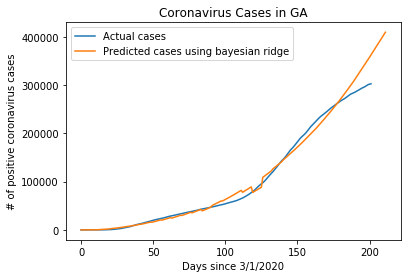

Completed: GA


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


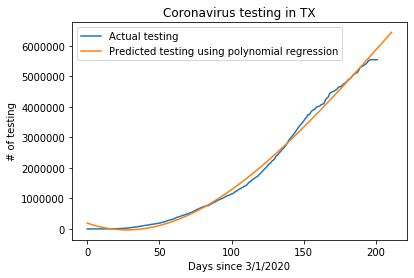

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    3.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


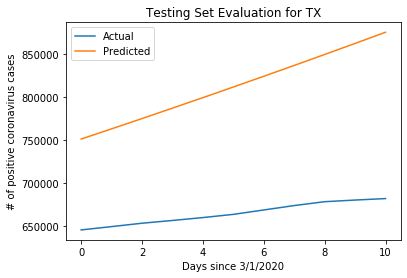

MAE: 147668.2727862688
MSE: 22540547808.579407
Weight: [-9.71325229e-08  1.21511773e-04 -9.27211121e-10  2.14194707e-06
 -1.14802446e-06 -7.30701763e-07  2.36864239e-02  1.16035082e-06
  2.11183333e-04  5.72931321e-05  9.25311709e-05 -8.67774124e-12
  2.04539308e-08 -1.09626700e-08 -6.97758609e-09  6.37339167e-07
  1.71281672e-06  2.12586737e-06 -1.18374920e-06 -1.28718790e-06
 -1.17513730e-06  1.07537707e-01  2.26188374e-04 -1.33625444e-03
  1.72242433e-02  2.23769310e-02  1.10805149e-08  2.01664949e-06
  5.47108352e-07  8.83606376e-07 -9.44715685e-05  1.66617910e-04
  2.10446152e-04  3.11843931e-05  5.07078670e-05  7.26225847e-05
 -8.33560466e-14  1.95318910e-10 -1.04684934e-10 -6.66308105e-11
  6.08613308e-09  1.63561718e-08  2.03005101e-08 -1.13039562e-08
 -1.22917226e-08 -1.12217192e-08 -9.46900999e-07  4.94000635e-07
  6.36908115e-07  1.35164528e-06  1.70892327e-06  2.11475628e-06
 -1.11554804e-06 -1.21804354e-06 -1.38760494e-06 -1.47925720e-06]


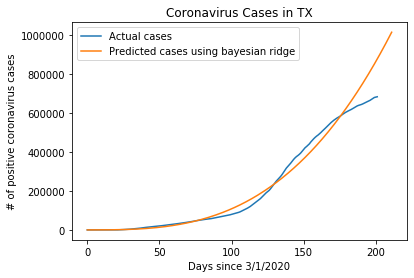

Completed: TX


In [221]:
states = ['FL', 'CA', 'GA', 'TX']

for state in states:
    positive = []
    pop_density = [] 
    testing = [] 
    
    # mobility data
    walking_weekday = [] 
    walking_weekend = [] 
    walking = []
    walking_weekday_window = 7
    walking_weekend_window = 7
    
    # adjust window size for mobility
    
    date_length = len(revised_unique_dates)
    
    # get cases in sequential order for each state
    for i in range(date_length):
        positive.append(new_data[new_data.date==unique_dates[i]][new_data.state==state].positive.sum())
        pop_density.append(new_data[new_data.state==state]['pop_dense'].max())
        testing.append(new_data[new_data.date==unique_dates[i]][new_data.state==state].totalTestResults.sum())
        
        # determines if it is a weekend or weekday 
        if weekday_or_weekend(unique_dates[i]): 
            walking_weekend.append(get_mobility_by_state('walking', state, revised_unique_dates[i]))
        else:
            walking_weekday.append(get_mobility_by_state('walking', state, revised_unique_dates[i]))
        
#         remainder = i % window_size 
#         if i - remainder + window_size < date_length:
#             walking.append(get_mobility_by_state('walking', state, revised_unique_dates[i-remainder], revised_unique_dates[i-remainder+window_size-1], 'median'))
#         else:
#             # if extrapolating use the mobility average from the last few days based on the window size
#             delta = date_length % window_size 
#             walking.append(get_mobility_by_state('walking', state, revised_unique_dates[date_length-delta-1], revised_unique_dates[date_length-1], 'median'))


    # remove any decreases in cum testing and positive cases
    for i in range(len(testing)):
        if i != 0:
            if testing[i] < testing[i-1]:
                testing[i] = testing[i-1]
            if positive[i] < positive[i-1]:
                positive[i] = positive[i-1]
    
    # remove 0 in mobility from both weekday and weekend data (there are few null values from Apple's mobility data)
    for i in range(len(walking_weekend)):       
        if walking_weekend[i] == 0 and i != 0:
            walking_weekend[i] = walking_weekend[i-1]
            
    for i in range(len(walking_weekday)):
        if walking_weekday[i] == 0 and i != 0:
            walking_weekday[i] = walking_weekday[i-1]
            
    
    # taking window average for mobility 
    walking_weekday_avg = window_average(7, walking_weekday, 'mean')
    walking_weekend_avg = window_average(7, walking_weekend, 'mean')

    
    # making sure the shape of the mobility arrays match 
    r_walking_weekday_avg = [] 
    r_walking_weekend_avg = [] 
    
    k = 0 
    j = 0 
    for i in range(date_length):
        if i % walking_weekday_window == 0 and i != 0:
            if k + walking_weekday_window < len(walking_weekday_avg):
                k += walking_weekday_window
            else:
                k = len(walking_weekday_avg) - 1 
                
            if j + walking_weekend_window < len(walking_weekend_avg):
                j += walking_weekend_window
            else:
                j = len(walking_weekend_avg) - 1
        
        r_walking_weekday_avg.append(walking_weekday_avg[k])
        r_walking_weekend_avg.append(walking_weekend_avg[j])
        

    # take moving average for positive cases
    positive = moving_positive_cases(positive, 3)

    # future testing extrapolations from poylnomial prediction 
    future_testing = future_testing_extrapolation(days_since_3_1, testing, future_dates, state)
    for i in future_testing:
        testing.append(testing[-1] + i)
    
    testing = np.array(testing).reshape(-1, 1)
    positive = np.array(positive).reshape(-1, 1)
    r_walking_weekday_avg = np.array(r_walking_weekday_avg).reshape(-1, 1)
    r_walking_weekend_avg = np.array(r_walking_weekend_avg).reshape(-1, 1)
    
    min_max_scaler = MinMaxScaler()
    testing = min_max_scaler.fit_transform(testing)
    r_walking_weekday_avg = min_max_scaler.fit_transform(r_walking_weekday_avg)
    r_walking_weekend_avg = min_max_scaler.fit_transform(r_walking_weekend_avg)
    
    # combining the two features
    X = [] 
    future_forecast = []
    
    for i in range(len(days_since_3_1)):
        X.append([days_since_3_1[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
    
    X = np.array(X, object).reshape(-1, 5)
    
    for i in range(len(future_dates)):
        if i < date_length:
            future_forecast.append([future_dates[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[i][0], r_walking_weekend_avg[i][0]])
        else:
            future_forecast.append([future_dates[i][0], pop_density[0], testing[i][0], r_walking_weekday_avg[-1][0], r_walking_weekend_avg[-1][0]])
            
    future_forecast = np.array(future_forecast, object).reshape(-1, 5)
    
    # splitting into training and testing sets 
    X_train, X_test, y_train, y_test = train_test_split(X, positive, shuffle=False, test_size=0.05)
    bayesian_ridge(X_train, X_test, y_train, y_test, future_forecast, state)
